# NBA Home Team Point Differential Data Analysis

### Spring 2025 Data Science Project

**Team Members:**  
Michael Sini, Dimitrios Angelakos, Ryley Haynes, Aidan Caruso

---

### Contributions
<ol type="A">
<li>Project idea</li>


*   This was a group effort, with the project idea discussed and agreed upon by all members.   


<li>Dataset Curation and Preprocessing</li>


*   Aiden was responsible for curation and preprocessing the dataset.



<li>Data Exploration and Summary Statistics</li>



*   Ryley, Michael, and Dimitrios were each responsible for a exploratory data analysis on one feature, and the resulting summaries.






<li>ML Algorithm Design/Development</li>


*   Michael and Dimitrios were responsible for the design and development of our machine learning algorithms



<li>ML Algorithm Training and Test Data Analysis</li>


*   Dimitrios and Michael were responsible for the machine learning training and test data analysis



<li>Visualization, Result Analysis, Conclusion</li>


*   Aiden was responsible for creating the visualizations


*   Ryley was responsible for the result analysis and conclusion creation






<li>Final Tutorial Report Creation</li>


*   Ryley headed the report creation, with every member also contributing.



</ol>

## 1. Introduction

The National Basketball Association (NBA) is one of the most globally recognized sporting leagues, existing as a pinnacle for sporting talent in the world of basketball. With that much recognition and prestige, teams are always trying to find aspects of the game to focus and improve upon. In a game as fast and dynamic as basketball there exist a multitude of factors that contribute to whether a team will score a set amount of points and go on to win or lose a game. Through understanding the most important statistical indicators one can recognize and more easily predict scoring outcomes. This knowledge is extremely beneficial and can help teams hone in on and train a particular aspect of their game, assist bettors to more easily predict an informed pointage and game outcome, and give the average fan a deeper understanding of how likely their team is to win.

In this tutorial we plan on undertaking the data science lifecycle in order to uncover the key statistics that most strongly predict point differential in an NBA game.

<br><br>
**Our Data Science Life Cycle)**


*   Data Curation
*   Exploratory Data Analysis
*  Primary Ananlysis and Visualization
*   Insights / Conclusion





##2. Data Curation

The dataset utilized is obtained from the Kaggle [NBA Database](https://www.kaggle.com/datasets/wyattowalsh/basketball), which features an extensive set of analytics on game and player data. We will be focusing specifically on the “game.csv” file which includes data specifically on the game stat-lines and information. This includes information about teams, game outcomes, and various performance metrics such as field goals, rebounds, assists, and other statistical categories.
<br><br><br>
We will important the Pandas and Scripy Python libraries, in order to pre-process our data and prepare it for analysis.

In [13]:
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

<br>

First, we ensured the date column was correctly formatted in the datetime format, to promote easier filtering. Upon initial processing of the data it became apparent that prior to 1985 there started to become incomplete/missing data. Thus, we decided to exclude any analysis from before April 16, 1985 in order to ensure accuracy and reliability.

Looking at some of the features in the file, it became apparent not all features were relevant to our analysis. Several unnecessary features were dropped, such as video_available_home and video_available_away, which had no impact on our analysis. Additionally, any games with missing information were determined to be unhelpful, and thus were dropped from our analysis to avoid potential errors or bias.

Utilizing feature engineering we created a new column, winner, to provide a simpler indication as to whether the home or away team won the game in question. This column replaced the existing 'wl_home' and 'wl_away' columns which provided information regarding the winner in a convoluted way and were subsequently dropped from the dataset.


In [14]:
df = pd.read_csv('game.csv')

#filter out games prior to 4/16/1985
df['game_date'] = pd.to_datetime(df['game_date'])
cutoff_date = '1985-04-16'
df = df[df['game_date'] >= cutoff_date]

df.set_index('game_id', inplace=True)

df.sort_values(by='game_date', ascending=True, inplace=True)

#drop unhelpful and missing data
df.drop(columns=['matchup_home', 'video_available_home', 'matchup_away', 'video_available_away'], inplace=True)
df.dropna(inplace=True)

#create a column representing if the home team won or lost the game
df["winner"] = df.apply(lambda row: "Home" if row["wl_home"] == "W" else "Away", axis=1)
df.drop(columns=['wl_home', 'wl_away'], inplace=True)

df.shape

(46105, 49)

After cleaning our DataFrame we were left with 46,105 games, providing a deep basis to get our data analysis underway.

## 3. Exploratory Data Analysis

In this stage of the Data Science lifecycle we will begin our exploratory analysis of our pre-processed DataFrame, where we will observe and look for potential trends or correlations between features. Included in our exploration we will include statistical analyses in order to properly determine degree of significance. We decided to explore three key data features.


*   **Free Throw Attempts**
*   **Margin of Victory**
*   **Rebounds**






###Home vs. Away: Free Throw Attempts

A main feature of the dataset includes the amount of free throws given to the Home and Away team during their game. Thus, we decided to explore those features to determine whether or not being the home team effects the amount of free throws a team will receive. <br><br>




In [15]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.weightstats import ztest as ztest

<br><br>In order to perform our analysis on free-throws we first aggregated the means and standard deviations for the free throws given for home and away teams. We decided to use a two-sample z-test to test the difference between the two means as we are comparing the means of two independent groups home vs. away teams.

Mean Free Throws Given to Away Team: 24.70445721722156
Standard Deviation Away: 7.908134118928598
Mean Free Throws Given to Home Team: 25.90940245092723
Standard DeviationHome: 8.362306790972092
zscore: -22.479562987132304
Reject the null hypothesis, pscore =  6.578371522053278e-112
Cohen's d: -0.1480569670993838


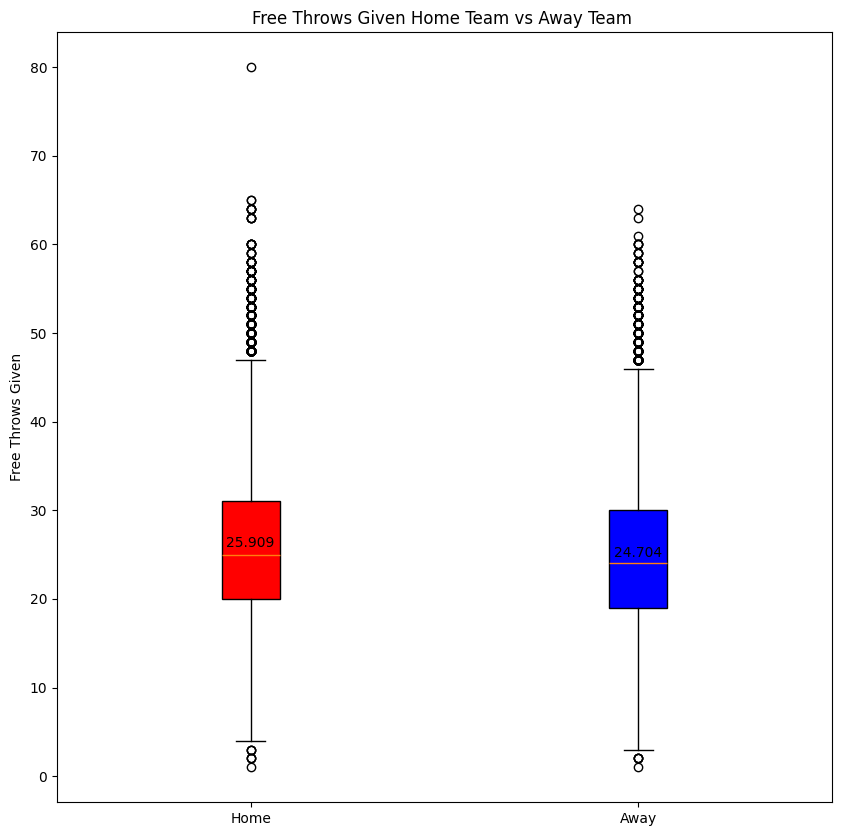

In [16]:
#Aggregate free throw data
mean_fta_away = df['fta_away'].mean()
standard_deviation_fta_away = df['fta_away'].std()
mean_fta_home = df['fta_home'].mean()
standard_deviation_fta_home = df['fta_home'].std()
print(f"Mean Free Throws Given to Away Team: {mean_fta_away}")
print(f"Standard Deviation Away: {standard_deviation_fta_away}")
print(f"Mean Free Throws Given to Home Team: {mean_fta_home}")
print(f"Standard DeviationHome: {standard_deviation_fta_home}")

#Calculate z-score
zscore, pscore = ztest(df['fta_away'], df['fta_home'], alternative='two-sided')
print(f"zscore: {zscore}")

alpha = 0.05
if pscore < alpha:
    print("Reject the null hypothesis, pscore = ", pscore)
else:
    print("Fail to reject the null hypothesis. pscore = ", pscore)

#Calculate Cohen's D result
cohens_std = np.sqrt((standard_deviation_fta_away**2 + standard_deviation_fta_home**2) / 2)
cohen_d = (mean_fta_away - mean_fta_home) / cohens_std
print(f"Cohen's d: {cohen_d}")

#Create plot
plt.figure(figsize=(10, 10))
boxplot = plt.boxplot([df['fta_home'], df['fta_away']], labels=['Home', 'Away'], patch_artist=True)
plt.title('Free Throws Given Home Team vs Away Team ')
plt.ylabel('Free Throws Given')
boxplot['boxes'][0].set_facecolor('red')
boxplot['boxes'][1].set_facecolor('blue')
plt.text(1, mean_fta_home, f'{mean_fta_home:.3f}', horizontalalignment='center' )
plt.text(2, mean_fta_away, f'{mean_fta_away:.3f}', horizontalalignment='center')
plt.show()

The plot illustrates that the home and away team are given a similar amount of free-throws on average. With the home team being given about 26 and the away team being given about 25. By looking at the standard deviations it is evident that they are about the same no matter if a team is home or away.<br><br>


Using a two-sample z-test with a signficance level of 0.05 the following hypotheses were tested<br><br>
Hypotheses:
- $H_{0}$ = The Home team is given the same amount of free throws as the Away team
- $H_{A}$ = The Home team is given a different amount of free throws then the Away team <br><br>
The resulting test gave a zscore of -22.479562987132304 and a pscore of 6.578371522053278e-112. Due to the pscore being lower than the alpha value of 0.05 we reject the null hypothesis. There is a statistically signficant difference between the amount of free throws given for the home and away team. This means that the data consistently shows a difference between the free throws Home and Away teams are given. <br><br>



Due to the large nature of the data, values can be shown as statistically significant while in practicality are not significant. Hence, we calculated Cohen's D to determine practical difference between the mean. <br>
- Cohens D = -0.1480569670993838
  - This shows that there is a small difference in means where away teams are given less free throws. However, there is no practical difference between the means for the Home and Away teams. This is supported by the boxplot, which illustrates a similar distirbution between Home and Away teams, with slight favor towards the Home team.<br><br>



Summary: There is a significant difference between the free throws given to the Home and Away team. Consistently, there is a slight trend of Away teams being given less free throws. However, in practicality for the game of basketball there is a very miniscule difference.

###Home vs. Away: Margin of Victory


**Is there a significant difference between the margin of victory of home and away wins?**

$H_{0}$: Being home or away has no affect on margin of victory.

$H_{A}$: Being home leads to larger victories than being away.

$\alpha = 0.05$

Since we are only looking at wins, the data will likely be right skewed. This is because most wins are only by a few points (near 0) and margin of victory can only be positive. This means the data are not normal, so we will be using a Mann-Whitney U Test.

Mean home margin of victory: 11.977
Mean away margin of victory: 9.848

Mann-Whitney U Statistic: 2.927e+08
p-value: 2.347e-166



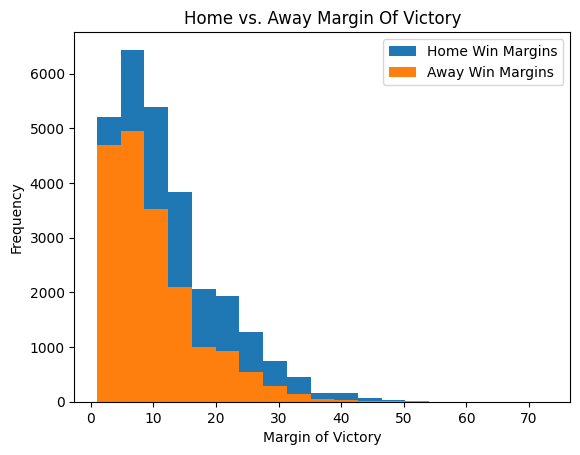

In [17]:
#Aggregate the data features
home_win_margins = df['plus_minus_home'][df['plus_minus_home'] > 0]
away_win_margins = df['plus_minus_away'][df['plus_minus_away'] > 0]
mean_home_win_margin = home_win_margins.mean()
mean_away_win_margin = away_win_margins.mean()
print(f'Mean home margin of victory: {mean_home_win_margin:.3f}')
print(f'Mean away margin of victory: {mean_away_win_margin:.3f}\n')

#Perform mann-whitney test
statistic, p_value = stats.mannwhitneyu(home_win_margins, away_win_margins, alternative='greater')
print(f'Mann-Whitney U Statistic: {statistic:.3e}')
print(f'p-value: {p_value:.3e}\n')

bin_edges = np.linspace(min(home_win_margins.min(), away_win_margins.min()), max(home_win_margins.max(), away_win_margins.max()), 20)

#plot graph
plt.hist(home_win_margins, bins=bin_edges, label='Home Win Margins')
plt.hist(away_win_margins, bins=bin_edges, label='Away Win Margins')
plt.legend()
plt.title('Home vs. Away Margin Of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

Through observing the plot, we can clearly see that the home team, more often, has a higher margin of victory.

Since the p-value of $2.34 \times 10^{-166}$ is less than the $\alpha$ of 0.05, we reject the null hypothesis. There is significant evidence to show that being at home increases the margin of victory.


### Offensive vs defensive rebounds impact on score difference

Rebounds are a crucial part of basketball. We wanted to see the correlation between offensive and defensive rebounds and their relationship to the point difference of a game.<br><br>



In [18]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy

<br><br>
We calculated the offensive rebound difference and defensive rebound difference by subtracting the away team’s rebounds from the home team’s rebounds. We then measured the overall rebound difference by summing offensive and defensive differences.

Then we used the Pearson correlation coefficient to assess how the rebound differences correlate with the home team’s margin of victory

In [19]:
#Calculate the difference in rebounds
df['oreb_diff'] = df.apply(lambda row: row['oreb_home'] - row['oreb_away'], axis=1)
df['dreb_diff'] = df.apply(lambda row: row['dreb_home'] - row['dreb_away'], axis=1)
df['reb_diff'] = df.apply(lambda row: row['oreb_diff'] + row['dreb_diff'], axis=1)

rebDf = df[['oreb_home', 'dreb_home', 'oreb_away', 'dreb_away', 'oreb_diff', 'dreb_diff', 'reb_diff', 'plus_minus_home']]
print("defensive rebound point difference correlation:",scipy.stats.pearsonr(rebDf['dreb_diff'], rebDf['plus_minus_home']))
print("offensive rebound point difference correlation:",scipy.stats.pearsonr(rebDf['oreb_diff'], rebDf['plus_minus_home']))

defensive rebound point difference correlation: PearsonRResult(statistic=np.float64(0.613248663932224), pvalue=np.float64(0.0))
offensive rebound point difference correlation: PearsonRResult(statistic=np.float64(-0.05373368270609853), pvalue=np.float64(7.754852615441134e-31))


<br><br> Based on our computation of offensive rebounds, we plotted offensive rebounds vs score difference utilizing a scatter plot.

As the plot illustrates, the points are distributed relatively uniformly emboldening the idea of offensive rebounds not being significantly correlated to score difference

Text(0, 0.5, 'offensive rebounds')

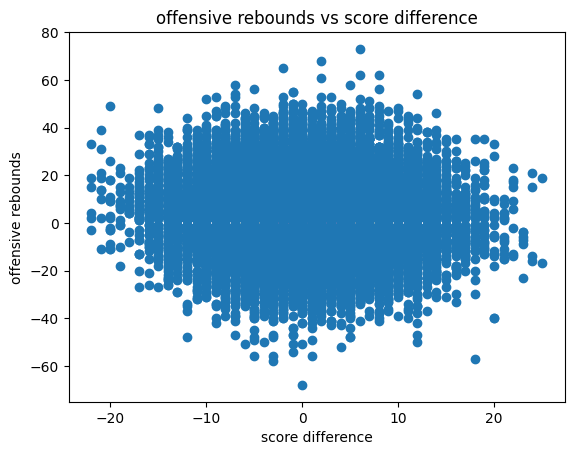

In [20]:
#Plot the graph
plt.scatter(rebDf['oreb_diff'], rebDf['plus_minus_home'])
plt.title("offensive rebounds vs score difference")
plt.xlabel("score difference")
plt.ylabel("offensive rebounds")

<br><br> Based on our computation of defensive rebounds, we plotted defensive rebounds vs score difference utilizing a scatter plot.

As the plot illustrates, the points are not distributed uniformly, instead highlighting a correlation. Which emboldens the idea that defensive rebounds  being significantly correlated to score difference

Text(0, 0.5, 'defensive rebounds')

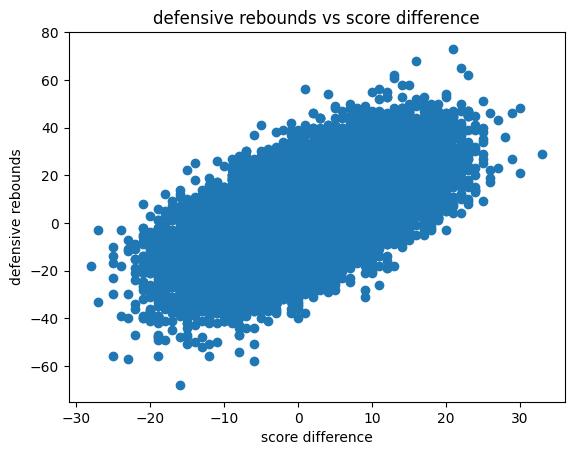

In [21]:
#Plot the graph
plt.scatter(rebDf['dreb_diff'], rebDf['plus_minus_home'])
plt.title("defensive rebounds vs score difference")
plt.xlabel("score difference")
plt.ylabel("defensive rebounds")

<br><br>
Our testing found that offensive rebounds with a pearson correlation coefficient of -0.0537. This is a very weak negative correlation with the score difference, meaning it had almost no impact on the score difference.
On the other hand defensive rebounds had a moderatley positive pearson correlation coefficient of 0.6132 showing they moderately affected the score difference.

## 4. Primary Analysis


Based on our initial exploration of the DataFrame we were able to gain a better idea of significant game statistics to use for the purpose of our analysis. The goal of our primary analysis is to see how offensive rebound, defensive rebound, block, free throw percentage, steal, turnover, and 3 point percentage difference affect the home plus-minus point value.


For the purpose of our analysis we will be using a regression model. This is a good choice as we are testing how the outcomes of multiple independent variables regarding game statistics affect the dependent variable - being the home team’s plus-minus point value. The regression model will not only allow us to understand relationships between our variables to a higher degree, but also be able to more effectively predict future outcomes.



In [22]:
# Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

import ast
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Add the classifiers to the imports here:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor

Since we are interested in isolating features highlighting the difference between the home and away teams, we subtract away statistics from home statistics. This creates our “*_diff” variables which we use to better gauge if the home team is over/under performing through team comparison.


We create plus_minus_home -representative of the net point difference for the home team- which is the variable we will be predicting.


Then we scale our data to ensure standardization, before splitting our data into training and testing groups.


In [23]:
#Creating our data frame
X = pd.DataFrame()
X['oreb_diff'] = df['oreb_home'] - df['oreb_away']
X['dreb_diff'] = df['dreb_home'] - df['dreb_away']
X['blk_diff'] = df['blk_home'] - df['blk_away']
X['ft_pct_diff'] = df['ft_pct_home'] - df['ft_pct_away']
X['stl_diff'] = df['stl_home'] - df['stl_away']
X['tov_diff'] = df['tov_home'] - df['tov_away']
X['pct_fg3_diff'] = (df['fg3a_home']/df['fga_home']) - (df['fg3a_away']/df['fga_away'])
features = ['oreb_diff', 'dreb_diff', 'blk_diff', 'ft_pct_diff', 'stl_diff', 'tov_diff', 'pct_fg3_diff']
y = df['plus_minus_home'] #predictive feature

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

We must decide which type of regression model would best suit our analysis, hence we will perform a k-fold cross validation, with 5 folds. This will test the $R^2$ value of each model to evaluate how well each one predicts the home team’s performance. The models to compare are linear regression, Ridge regression, random forest regressor and gradient boosting algorithm.

In [24]:
kf = KFold(n_splits=5, shuffle=True)

lin_model = LinearRegression()
lin_model.fit(X_train_scaled,y_train)
print(f'R2 for Linear Regression: {lin_model.score(X_test_scaled,y_test):.3f}')

ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10], cv=kf).fit(X_train, y_train)
print(f'R2 for Ridge Regression: {ridge.score(X_test,y_test):.3f}')

rf_model = make_pipeline(StandardScaler(), RandomForestRegressor())
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='r2')
print(f'R2 for Random Forest Regression: {rf_scores.mean():.3f}')

gb_model = make_pipeline(StandardScaler(), GradientBoostingRegressor())
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='r2')
print(f'R2 for Gradient Boosting Regression: {gb_scores.mean():.3f}')

R2 for Linear Regression: 0.742
R2 for Ridge Regression: 0.742
R2 for Random Forest Regression: 0.710
R2 for Gradient Boosting Regression: 0.729


Upon observing the cross validation scores we decide that we should use Linear regression to try and predict the values due to its simplicity and performance in the cross validation.

In [25]:
lin_y_pred = lin_model.predict(X_test_scaled)

# Metrics
mse = mean_squared_error(y_test, lin_y_pred)
r2 = r2_score(y_test, lin_y_pred)
print("Linear regression")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear regression
Mean Squared Error: 47.09
R² Score: 0.74


We can see that from the mean squared error value and $R^2$ score that our model performs decently on our test data, explaining much of the variability of the data.

<br><br>Next we will calculates and visualizes the importance of each feature in our linear regression model. We will be utilizing correlation coefficients, where higher more positive coefficients represent a stronger influence on our predictions.

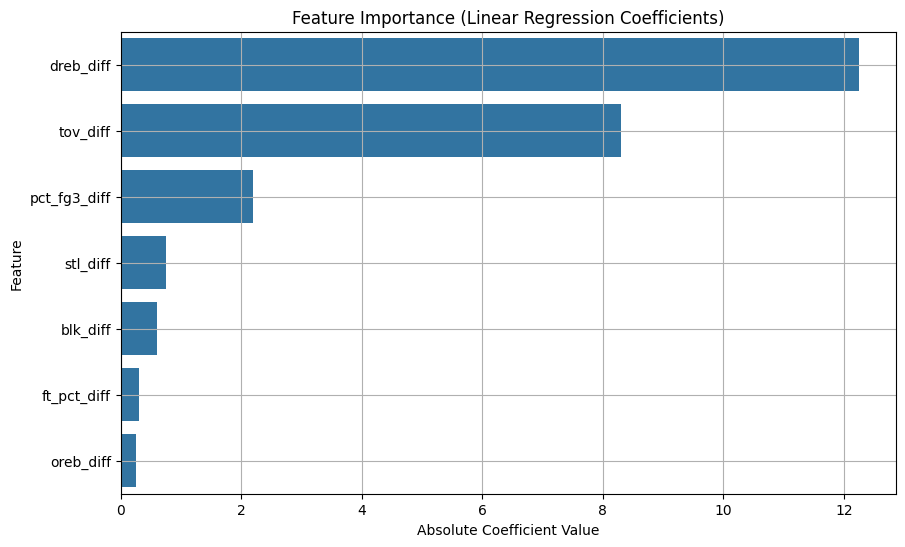

In [26]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lin_model.coef_,
    'Abs_Coefficient': np.abs(lin_model.coef_)
})

# after we get the feature importance from the coefficient of each feature
# we sort by their absolute value to get the most important features in
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Abs_Coefficient', y='Feature')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

We can see that the most important factor in predicting the home plus-minus score is the difference in defensive rebounds. Other features like the turnover difference as well as the three-point field goal percentage also have a strong influence. This tells us that if we want to know what the team plus-minus score is we can look at the difference in these three features to try and predict so

<br><br>
Now we will create a scatter plot comparing the actual home plus-minus values to the values predicted by the linear regression model

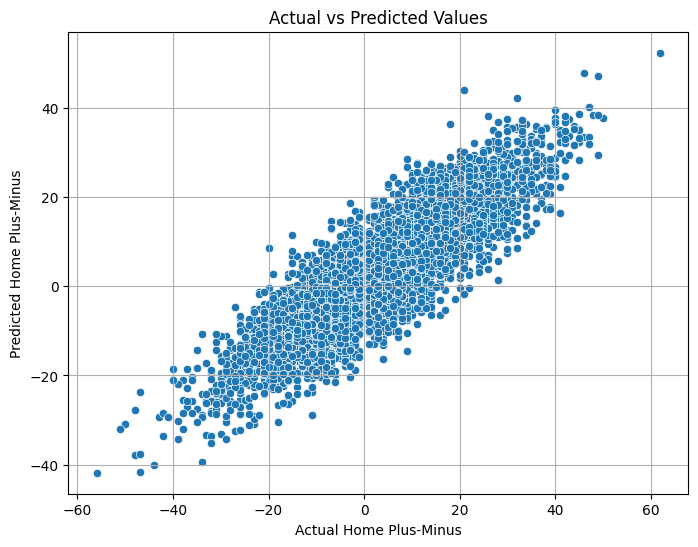

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=lin_y_pred)
plt.xlabel("Actual Home Plus-Minus")
plt.ylabel("Predicted Home Plus-Minus")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

Looking at the actual home plus-minus values vs. the predicted values we can
see that there is a clean and clear upward trend. Although the line is somewhat "thick", with minor data spread, there exists a clear trend between the two shown by the strong $R^2$ value

<br><br>
Next we will plot the Standardized Residuals by taking the error divided by the standard deviation. This will help us better understand and visualize the outliers in our data

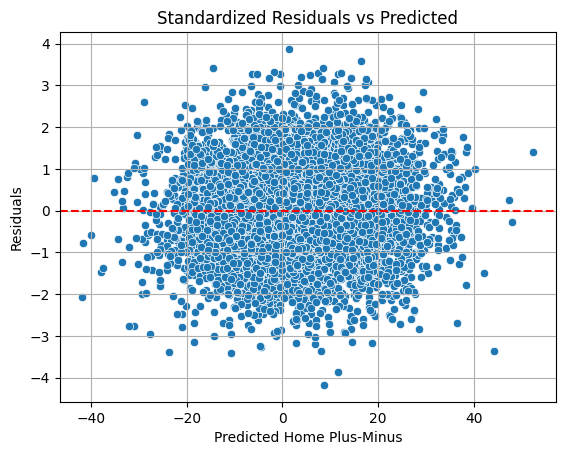

In [28]:
residuals = y_test -  lin_y_pred
std_residuals = residuals / np.std(residuals)
sns.scatterplot(x=lin_y_pred, y=std_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Home Plus-Minus")
plt.ylabel("Residuals")
plt.title("Standardized Residuals vs Predicted")
plt.grid(True)
plt.show()

By looking at the plot of residuals we can see that our predictions center around zero and do not tend to be under/overfit the data. Although our residual values themselves are shown to have some outliers

<br><br>
Now we will plot a Correlation Matrix to get a numerical grasp on how strongly each of our features are related to the home plus-minus, as well as to each other.

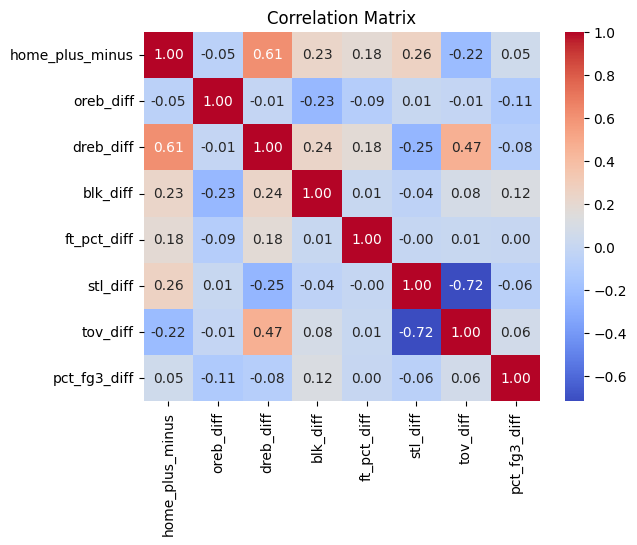

In [29]:
df_corr = X
df_corr.insert(0, 'home_plus_minus', y)
df_corr = df_corr.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Looking at the correlation matrix we can see that their is correlation between defensive rebound and the home_plus_minus which explains why the defensive rebound is the most important feature. We can see that their is also a strong negative correlation between steal differential and turnover differential which makes sense as steals and turnovers are directly correlated.

<br><br>
On top of the regression model that we utilized, we also decided to create and implement a neural network model for the goal of predicting home plus-minus point differential.

We decided that a Multilayer Peceptron (MLP) would be the best model to use in this case. Where we can predict the outcome of point differential based upon our available data

In [30]:
#Import Libraries
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


Here we scale our data to ensure proper standardization, which will improve our accuracy. Additionally we split the data into the training and testing datasets, setting a batch size of 32 samples at a time.

In [31]:
#Perform data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Perform data training
X_train_tensor = torch.tensor(X_train_scaled).float()
y_train_tensor = torch.tensor(y_train.values).float().view(-1,1)
X_test_tensor = torch.tensor(X_test_scaled).float()
y_test_tensor = torch.tensor(y_test.values).float().view(-1,1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Here we actually define the MLP Model that we will be using, of the following format:


*   128 neurons
*   RELU
*   64 neurons
*   RELU
*   1 final output neuron







In [32]:
#Create the MLP Model and initialize the layers
class MLPModel(nn.Module):
  def __init__(self, feat_dim):
    super().__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(feat_dim, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 1),
    )

  def forward(self, x):
    return self.linear_relu_stack(x)

nn_model = MLPModel(feat_dim=X_train.shape[1])

Next we ensure that the mean squared error is computed, and that the model is optimized efffectively with a learning rate of 0.01.


We decide to train the model over 100 epochs where we undergo the following cycle:


*   Forward Pass
*   Compute Loss
*   Back Propogate
*   Update Weights





In [33]:
#Create the optimization
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.01)


epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    nn_model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):

        predicts = nn_model(data)
        loss = criterion(predicts, targets)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()



    losses.append(running_loss/len(train_loader))
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}')

print('Finished Training')

Epoch 1/100, Loss: 51.174333962790364
Epoch 2/100, Loss: 48.970852948641216
Epoch 3/100, Loss: 48.74604704559935
Epoch 4/100, Loss: 48.1298713650997
Epoch 5/100, Loss: 48.06136998278311
Epoch 6/100, Loss: 48.005282652657236
Epoch 7/100, Loss: 47.81409293552739
Epoch 8/100, Loss: 47.84206045800877
Epoch 9/100, Loss: 47.79420222888692
Epoch 10/100, Loss: 47.825371594193285
Epoch 11/100, Loss: 47.761960134646834
Epoch 12/100, Loss: 47.594260575558344
Epoch 13/100, Loss: 47.616205443740405
Epoch 14/100, Loss: 47.582159378170864
Epoch 15/100, Loss: 47.49034864883886
Epoch 16/100, Loss: 47.57466993307096
Epoch 17/100, Loss: 47.46512844949211
Epoch 18/100, Loss: 47.479767067372435
Epoch 19/100, Loss: 47.50962045806858
Epoch 20/100, Loss: 47.37710263764248
Epoch 21/100, Loss: 47.36615937457122
Epoch 22/100, Loss: 47.359724246618136
Epoch 23/100, Loss: 47.37919753505578
Epoch 24/100, Loss: 47.30845080472445
Epoch 25/100, Loss: 47.28038837965529
Epoch 26/100, Loss: 47.3551294917349
Epoch 27/100,

Here we can see the neural network is successfully optimizing as the epochs show a decrease in loss upon each iteration. Initially we start off with a loss of about 51 but as we progress towards the 100th epoch we reach a loss of around 46. This shows successful progress for the model, at a somewhat slow rate.

# 5. Insights and Conclusions

We have now concluded our primary analysis focused on understanding how differences between home and away teams in offensive rebound, defensive rebound, block, free throw percentage, steal, turnover, and three-point percentage affect the home team’s plus-minus outcome. After utilizing a linear regression model as well as a more complex neural network, we were able to accurately evaluate predictions and gain clearer insight into our topic of research.


Key Takeaways)


*   The linear regression model was well-performing with an $R^2$ value of 0.74 and a mean-squared error of about 46. Highlighting how a linear relationship explains a large degree of the variance in regards to our features and home plus-minus score.
*   Defensive rebounds were the strongest factor impacting home-plus minus score. This highlights that teams with a strong defensive presence in the paint, are often the one's more likely to control and go on to win a game.
*   Three-Point field goal percentage was a prominent factor in impacting home-plus minus score. Highlighting that teams who take advantage and capitalize on this type of shot have a strong grasp over their point differential. Hence, teams that are prominent at this shot ensure it is easier to close gaps, and win games.
*   Comparing the actual vs predicted data, as was done in our scatterplot, highlights a consistent upward trend. Highlighting how the predictions were relatively accurate. With slight spread likely being due to uncontrollable factors occuring during the wide breadth of games analyzed.
*   Our Residual plot was shown to be centered around zero, ensuring that our model was not over/underfitting. However, there was a noticeable spread in the data, highlighting how there is still room for improvement in predictvie accuracy.
*   Through testing our neural network model we were able to see that it did not better fit the data than our linear regression model. This shows that the data correlation is strongly linear.

<br><br>
If we could conduct further research we would expand our dataset to include player information, to further hone in on feature impact.

<br><br>

We hope that this deep-dive into our NBA Data Analysis has provided a clear illustration of the data science pipeline!










